In [1]:
# Set up GRASS environment
import os
from IPython.display import Image
from helper import show_interactively, show
import grass.script as gs
# had to add shell = True to helper.py for this to work
from helper import initialize_GRASS_notebook
initialize_GRASS_notebook(binary='grass83',
                          grassdata="D:\\grassdata", location="FUTURES_zoning_prelim",
                          mapset="input")

In [5]:
# road raster was made with mask so should be limited to the 6 county extent
!g.region raster=sa_counties@input res=30
!r.mask raster=roads@input maskcats=0

In [3]:
# python range isn't inclusive so end at 2022 actually ends at 2021
years = ','.join([str(i) for i in range(2012, 2022)])
years

'2012,2013,2014,2015,2016,2017,2018,2019,2020,2021'

In [6]:
gs.run_command('r.futures.demand', development='urban_2001,urban_2004,urban_2006,urban_2008,urban_2011',
               subregions='sa_counties', observed_population='D:\Zoning_Development\input_data\population_trend.csv',
               projected_population='D:\Zoning_Development\input_data\population_projection.csv',
               simulation_times=years, plot='plot_demand.png', demand='demand.csv',
               separator='comma', method='logarithmic')

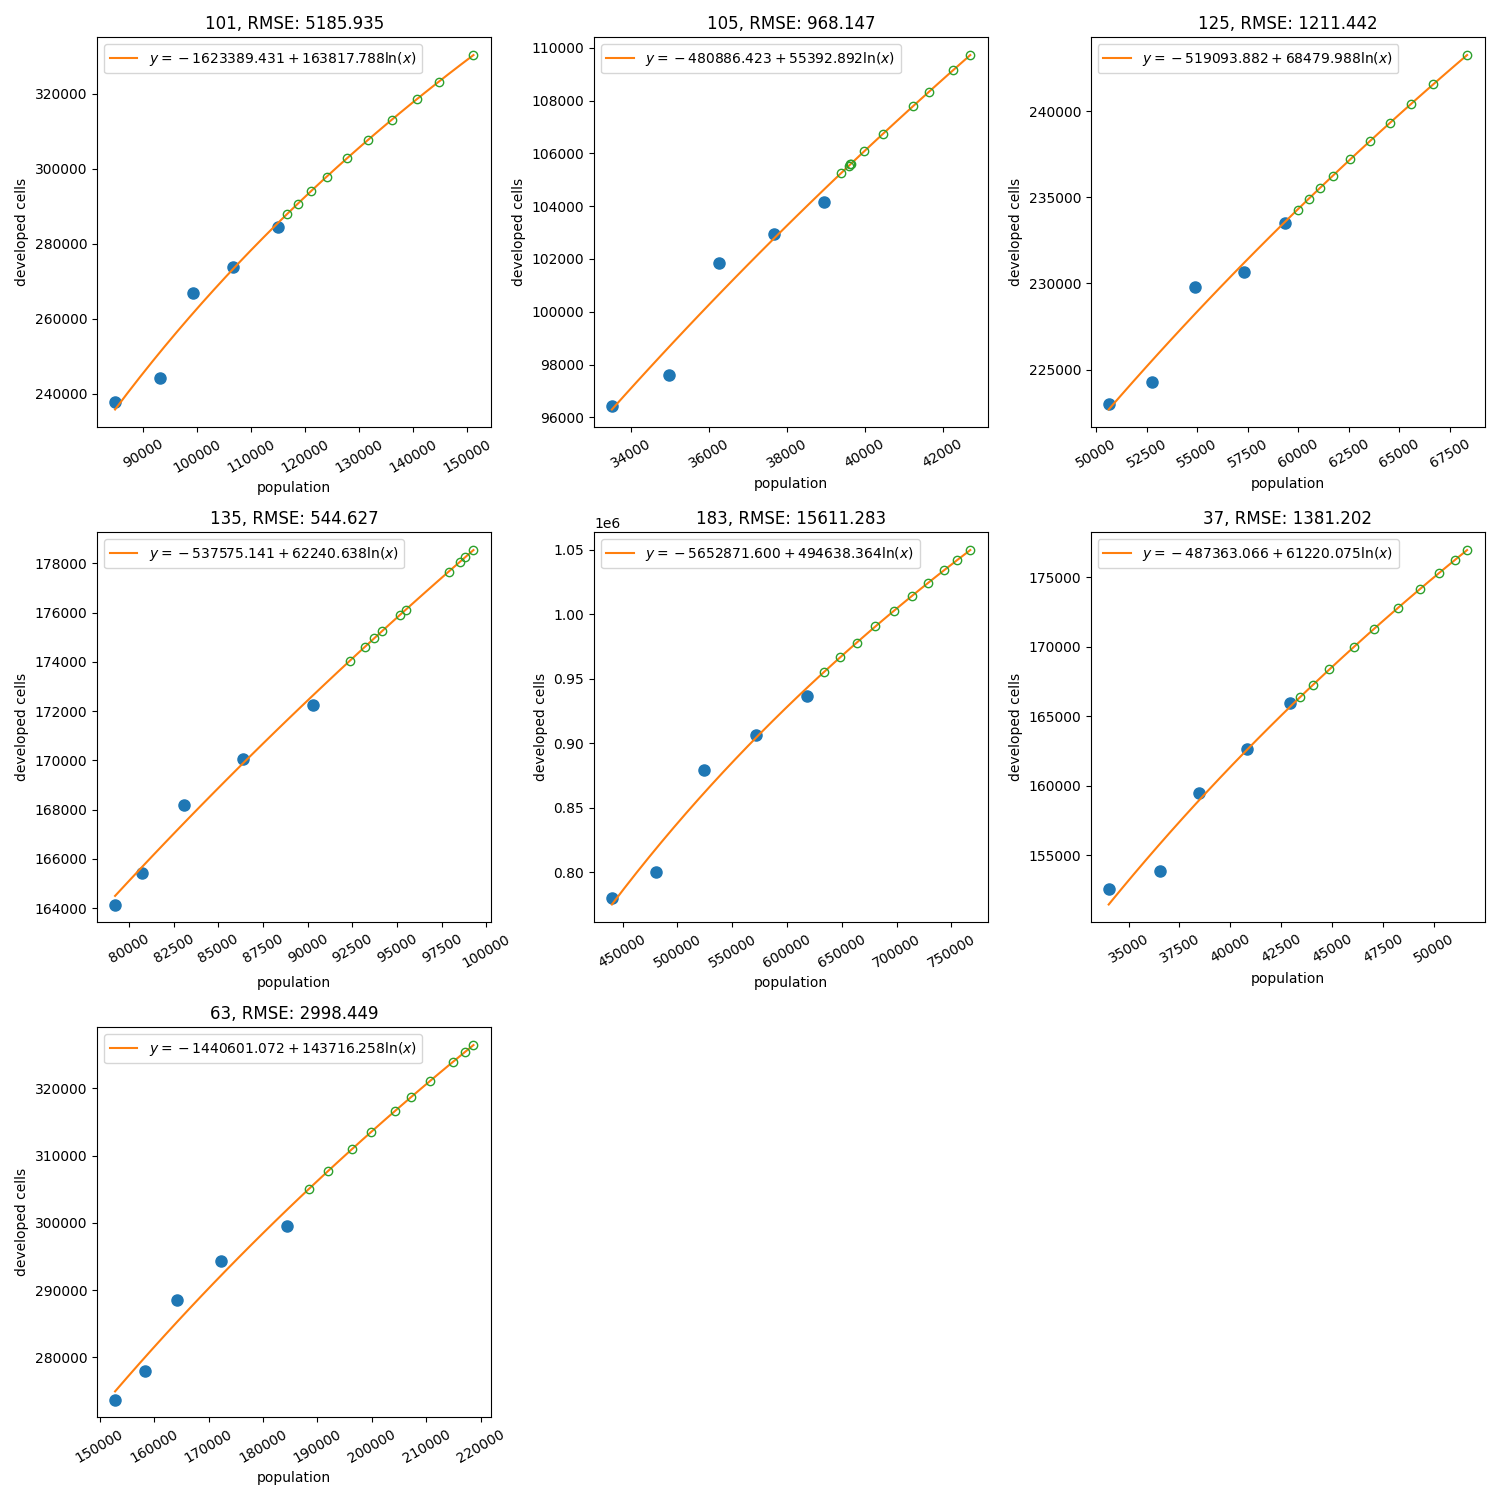

In [7]:
Image('plot_demand.png')

In [8]:
# reset mask to study area (roads not masked out)
!r.mask raster=sa_counties@input

All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.
